# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [246]:
# import math

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

# from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [247]:
df = pd.read_csv('previsao_de_renda.csv')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

<h3 style="color:green">Limpeza inicial dos dados</h3>

In [249]:
df.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'], inplace=True)
df.dropna

<bound method DataFrame.dropna of       sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos        tipo_renda  \
0        F             False             True           0        Empresário   
1        M              True             True           0       Assalariado   
2        F              True             True           0        Empresário   
3        F             False             True           1  Servidor público   
4        M              True            False           0       Assalariado   
...    ...               ...              ...         ...               ...   
14995    F             False             True           0        Empresário   
14996    F             False             True           0       Pensionista   
14997    F              True             True           0       Assalariado   
14998    M              True            False           0        Empresário   
14999    F             False             True           2  Servidor público   

                e

<h3 style="color:green">Separação em Train/Test, com 75% do dataset sendo para treino do modelo e 25% para teste</h3>

In [250]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=40)

<h3 style="color:green">Treinando o modelo com diferentes alphas</h3>

In [251]:
modelo = 'np.log(renda) ~ C(sexo, Treatment(1)) + C(posse_de_veiculo, Treatment(1)) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao, Treatment(2)) + C(estado_civil) + C(tipo_residencia, Treatment(0)) + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_train)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00000001 # Tive que colocar esse valor pois por algum motivo ele não consegue rodar .summary() com 0

                         , alpha = 0.1)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:02:27   Log-Likelihood:                -10177.
No. Observations:                9378   AIC:                         2.042e+04
Df Residuals:                    9346   BIC:                         2.066e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.9736      0.073    109.510      0.000       7.831       8.116
C(sexo, Treatment(1))[T.F]                           -0.7857      0.017    -46.589      0.000      -0.819      -0.753
C(posse_de_veiculo, Treatment(1))[T.False]           -0.0409      0.016     -2.522      0.012      -0.073      -0.009
C(posse_de_imovel)[T.True]                            0.0800      0.016      4.981      0.000       0.049       0.112
C(tipo_renda)[T.Bolsista]                             0.1739      0.254      0.684      0.494      -0.325       0.673
C(tipo_renda)[T.Empresário]                           0.1481      0.017      8.700      0.000       0.115       0.181
C(tipo_renda)[T.Pensionista]                         -0.4782      0.322     -1.485      0.138      -1.109       0.153
C(tipo_renda)[T.Servidor público]                     0.0576      0.026      2.234      0.026       0.007       0.108
C(educacao, Treatment(2))[T.Primário]                 0.1220      0.084      1.450      0.147      -0.043       0.287
C(educacao, Treatment(2))[T.Pós graduação]           -0.0289      0.154     -0.188      0.851      -0.331       0.273
C(educacao, Treatment(2))[T.Superior completo]        0.1158      0.016      7.242      0.000       0.084       0.147
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0278      0.037     -0.751      0.453      -0.100       0.045
C(estado_civil)[T.Separado]                           0.3707      0.117      3.173      0.002       0.142       0.600
C(estado_civil)[T.Solteiro]                           0.3043      0.115      2.650      0.008       0.079       0.529
C(estado_civil)[T.União]                             -0.0214      0.029     -0.744      0.457      -0.078       0.035
C(estado_civil)[T.Viúvo]                              0.4165      0.123      3.389      0.001       0.176       0.657
C(tipo_residencia, Treatment(0))[T.Casa]             -0.0577      0.062     -0.927      0.354      -0.180       0.064
C(tipo_residencia, Treatment(0))[T.Com os pais]      -0.0643      0.069     -0.927      0.354      -0.200       0.072
C(tipo_residencia, Treatment(0))[T.Comunitário]      -0.1298      0.123     -1.054      0.292      -0.371       0.112
C(tipo_residencia, Treatment(0))[T.Estúdio]           0.0376      0.116      0.324      0.746      -0.190       0.265
C(tipo_residencia, Treatment(0))[T.Governamental]    -0.0782      0.076     -1.035      0.301      -0.226       0.070
C(qt_pessoas_residencia, Treatment(2))[T.1.0]        -0.3144      0.114     -2.748      0.006      -0.539      -0.090
C(qt_pessoas_residencia, Treatment(2))[T.3.0]         0.3775      0.115      3.282      0.001       0.152       0.603
C(qt_pessoas_re

In [252]:
df_test.loc[:, 'predictions'] = reg.predict(df_test)
df_test = df_test.dropna(subset=['predictions'])
df_test.loc[:, 'log_renda'] = np.log(df_test['renda'])
r_squared = r2_score(df_test['log_renda'], df_test['predictions'])

In [253]:
r_squared

0.35278780793589526

<h3 style="color:green">Não houve diferença alguma entre os alphas</h3>

<h3 style="color:green">Testando com Lasso..</h3>

In [254]:
reg1 = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1

                         , alpha = 0.1)

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1226.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:02:27   Log-Likelihood:                -10293.
No. Observations:                9378   AIC:                         2.060e+04
Df Residuals:                    9374   BIC:                         2.063e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             8.1137      0.034    240.018      0.000       8.047       8.180
C(sexo, Treatment(1))[T.F]                           -0.7846      0.016    -49.693      0.000      -0.816      -0.754
C(posse_de_veiculo, Treatment(1))[T.False]                 0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Casa]                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Governamental]          0          0        nan        nan           0           0
C(qt_pessoas_residencia, Treatment(2))[T.1.0]              0          0        nan        nan           0           0
C(qt_pessoas_residencia, Treatment(2))[T.3.0]              0          0        nan        nan           0           0
C(qt_pessoas_re

In [255]:
df_test.loc[:, 'predictions'] = reg1.predict(df_test)
df_test = df_test.dropna(subset=['predictions'])
df_test.loc[:, 'log_renda'] = np.log(df_test['renda'])
r_squared = r2_score(df_test['log_renda'], df_test['predictions'])

In [256]:
r_squared

0.3413227508430563

<h3 style="color:green">É possível perceber que a regularização Ridge é ligeiramente superior neste caso</h3>

<h3 style="color:green">Tentei rodar o modelo stepwise porém encontro um erro de tipo na execução, não sei se algo pode ter mudado de um tempo pra cá que fez esse pedaço de código (stack overflow) não funcionar mais</h3>

<h3 style="color:green">Até o momento, o modelo ridge continua sendo o mais otimizado, portanto, tentarei algumas otimizações nele</h3>

In [257]:
values_l1_wt = np.arange(0, 1.1, 0.1) 
values_alpha = [0.01, 0.05, 0.1]
results = []

<h3 style="color:green">O loop demora cerca de 20 segundos para rodar.. Ele tem o objetivo de descobrir o valor ótimo para r_squared dadas diversas combinações de l1_wt e alpha</h3>

In [258]:
modelo = 'np.log(renda) ~ C(sexo, Treatment(1)) + C(posse_de_veiculo, Treatment(1)) + C(posse_de_imovel) + C(tipo_renda) + C(educacao, Treatment(2)) + C(estado_civil) + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
for l1_wt in values_l1_wt:
    for alpha in values_alpha:
        md = smf.ols(modelo, data=df_train)
        reg = md.fit_regularized(method='elastic_net', refit=True, L1_wt=l1_wt, alpha=alpha)

        if hasattr(reg, 'rsquared'):
            r_squared_values = reg.rsquared
            results.append((l1_wt, alpha, r_squared_values))

results_df = pd.DataFrame(results, columns=['L1_wt', 'Alpha', 'R_squared_values'])

<h3 style="color:green">Verificando o valor ótimo da lista de R quadrados</h3>

In [259]:
optimal_result = results_df.loc[results_df['R_squared_values'].idxmax()]
optimal_result

L1_wt               0.10000
Alpha               0.01000
R_squared_values    0.35776
Name: 0, dtype: float64

modelo com qtd_filhos -> 0.357848 </br>
modelo sem qtd_filhos -> 0.357572 </br>
modelo sem qtd_filhos e tipo_residencia -> 0.35776 </br>

<h3 style="color:green">Achei que seria interessante plotar um gráfico 3d para entendermos o relacionamento entre as diferentes variáveis e o R quadrado</h3>

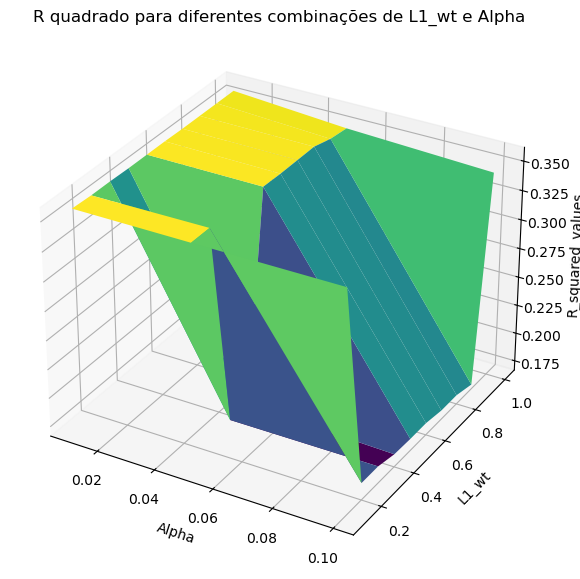

In [260]:
pivot_table = results_df.pivot(index='L1_wt', columns='Alpha', values='R_squared_values')
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
Z = pivot_table.values
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Alpha')
ax.set_ylabel('L1_wt')
ax.set_zlabel('R_squared_values')
ax.set_title('R quadrado para diferentes combinações de L1_wt e Alpha')

plt.show()

In [261]:
optimal_result

L1_wt               0.10000
Alpha               0.01000
R_squared_values    0.35776
Name: 0, dtype: float64

<h3 style="color:green">Treinando um modelo com os valores ótimos</h3>

In [262]:
modelo = 'np.log(renda) ~ C(sexo, Treatment(1)) + C(posse_de_veiculo, Treatment(1)) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao, Treatment(2)) + C(estado_civil) + C(tipo_residencia, Treatment(0)) + idade + tempo_emprego + C(qt_pessoas_residencia, Treatment(2))'
md = smf.ols(modelo, data = df_train)
reg_final = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.10000

                         , alpha = 0.01000)

reg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     306.9
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:02:39   Log-Likelihood:                -10189.
No. Observations:                9378   AIC:                         2.041e+04
Df Residuals:                    9361   BIC:                         2.054e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.9005      0.045    174.519      0.000       7.812       7.989
C(sexo, Treatment(1))[T.F]                           -0.7803      0.017    -46.614      0.000      -0.813      -0.747
C(posse_de_veiculo, Treatment(1))[T.False]           -0.0398      0.016     -2.473      0.013      -0.071      -0.008
C(posse_de_imovel)[T.True]                            0.0807      0.016      5.041      0.000       0.049       0.112
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1466      0.017      8.631      0.000       0.113       0.180
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                     0.0595      0.026      2.312      0.021       0.009       0.110
C(educacao, Treatment(2))[T.Primário]                 0.1260      0.084      1.506      0.132      -0.038       0.290
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]        0.1151      0.016      7.235      0.000       0.084       0.146
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0283      0.037     -0.765      0.444      -0.101       0.044
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Casa]             -0.0027      0.029     -0.092      0.927      -0.060       0.055
C(tipo_residencia, Treatment(0))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(0))[T.Estúdio]           0.0919      0.102      0.901      0.368      -0.108       0.292
C(tipo_residencia, Treatment(0))[T.Governamental]    -0.0218      0.052     -0.422      0.673      -0.123       0.079
C(qt_pessoas_residencia, Treatment(2))[T.1.0]              0          0        nan        nan           0           0
C(qt_pessoas_residencia, Treatment(2))[T.3.0]         0.0558      0.024      2.359      0.018       0.009       0.102
C(qt_pessoas_re

In [263]:
df_test.loc[:, 'predictions'] = reg_final.predict(df_test)
df_test = df_test.dropna(subset=['predictions'])
df_test.loc[:, 'log_renda'] = np.log(df_test['renda'])
r_squared = r2_score(df_test['log_renda'], df_test['predictions'])

In [264]:
r_squared

0.35256280190058154

<h3 style="color:green">Treinando uma árvore de regressão</h3>

In [320]:
y, X = patsy.dmatrices(
    'np.log(renda) ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + C(qt_pessoas_residencia)',
    df
)

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104)
tree1 = DecisionTreeRegressor(max_depth=7)
tree1.fit(X_train, y_train)

y_pred = tree1.predict(X_test)

results_df_tree = pd.DataFrame({
    'Actual': y_test,
    'y_pred': y_pred
})

In [321]:
results_df_tree

,Actual,y_pred
0,8.289130,8.742844
1,10.547867,9.076170
2,8.445949,8.102520
3,7.806599,8.184580
4,7.409367,7.481294
...,...,...
3102,8.670716,8.647812
3103,7.721508,7.990105
3104,7.737677,7.811461
3105,8.490510,7.655956


In [322]:
r_squared = tree1.score(X_test, y_test)
r_squared

0.372215146391767

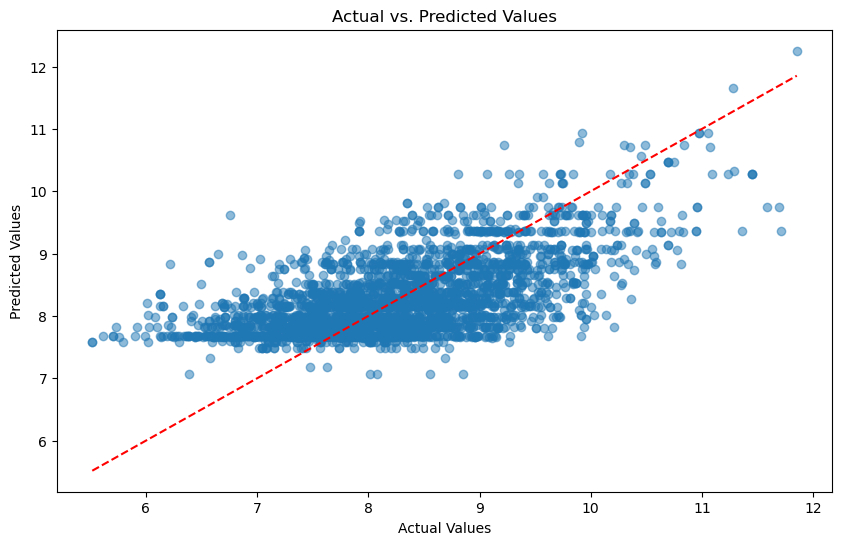

In [323]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

<h3 style="color:green">A árvore de regressão apresentou uma qualidade um pouco maior que os modelos de regressão</h3>